In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trn = pd.read_csv('activity_train.csv')
tst = pd.read_csv('activity_test.csv')

# EDA:

In [3]:
trn.head(2)

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1,...,fBodyGyroJerkMag_Skewness_1,fBodyGyroJerkMag_Kurtosis_1,tBodyAcc_AngleWRTGravity_1,tBodyAccJerk_AngleWRTGravity_1,tBodyGyro_AngleWRTGravity_1,tBodyGyroJerk_AngleWRTGravity_1,tXAxisAcc_AngleWRTGravity_1,tYAxisAcc_AngleWRTGravity_1,tZAxisAcc_AngleWRTGravity_1,activity
0,0.04358,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.03948,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5


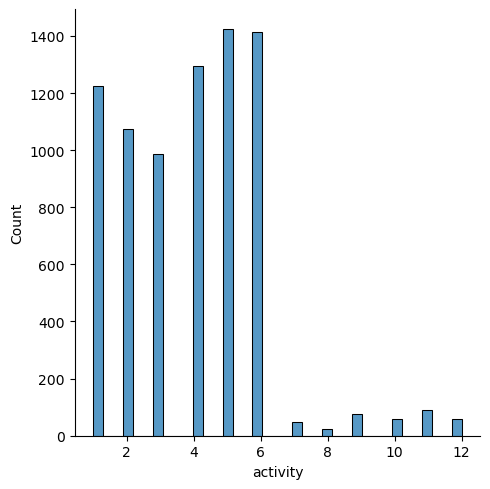

In [4]:
# Plot distribution of target variable
sns.displot(trn['activity'], kde=False)

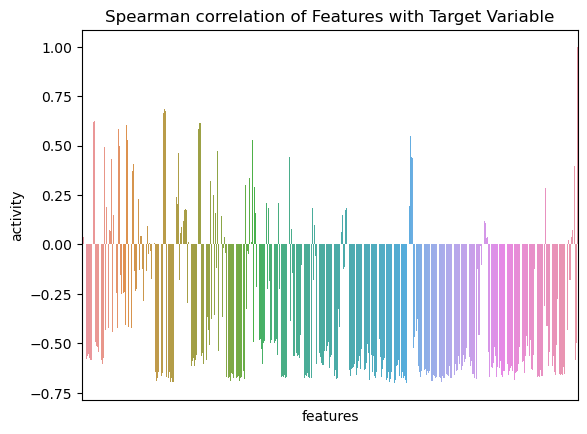

In [5]:
# Plot Corelation Matrix
# calculate spearman correlation
corr = trn.corr(method='spearman')['activity']
plt.title('Spearman correlation of Features with Target Variable')
sns.barplot(x=corr.index , y=corr)
plt.xticks([])
plt.xlabel('features')
plt.show()


In [6]:
# get the most correlated features
abs(corr).sort_values(ascending=False).head(16)

activity                          1.000000
fBodyAccJerk_Max_2                0.699551
fBodyAccJerk_ropy_1.1             0.699053
tBodyAccJerk_ropy_1.1             0.697515
tBodyAccJerk_ropy_1.2             0.696301
tBodyAccJerk_ropy_1               0.696004
fBodyAccJerk_BandsEnergyOld_27    0.695768
fBodyAccJerk_STD_2                0.695318
tBodyAccJerk_IQR_2                0.694973
tBodyAccJerk_Mad_2                0.694121
fBodyAccJerk_BandsEnergyOld_17    0.692862
tBodyGyroJerk_IQR_3               0.692647
tBodyGyroJerk_Mad_3               0.692432
fBodyAccJerk_Energy_2             0.690764
tBodyAccJerk_STD_2                0.690763
tBodyAccJerk_Energy_2             0.690762
Name: activity, dtype: float64

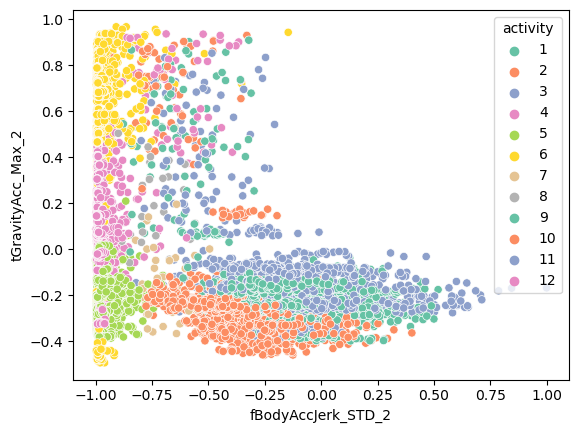

In [7]:
# Plot the most correlated features
sns.scatterplot(x='fBodyAccJerk_STD_2', y='tGravityAcc_Max_2', hue='activity', data=trn, palette='Set2')
plt.show()

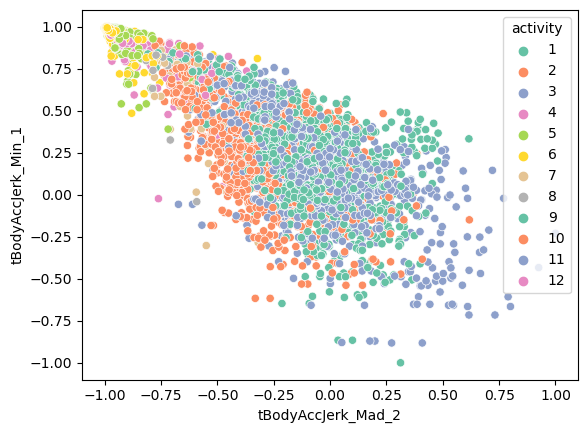

In [8]:
sns.scatterplot(x='tBodyAccJerk_Mad_2', y='tBodyAccJerk_Min_1', hue='activity', data=trn, palette='Set2')
plt.show()

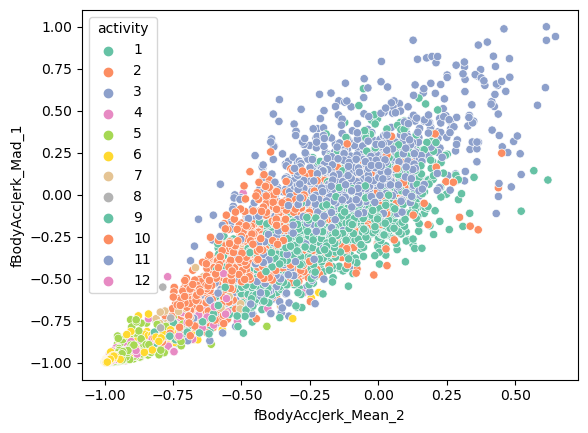

In [9]:
sns.scatterplot(x='fBodyAccJerk_Mean_2', y='fBodyAccJerk_Mad_1', hue='activity', data=trn, palette='Set2')
plt.show()

In [16]:
# Apply random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train = trn.drop(['activity'], axis=1)
y_train = trn['activity']

X_test = tst.drop(['activity'], axis=1)
y_test = tst['activity']
rf_res = []
rf_by_class = []
max_features_ = [2, 5, 7, 10, 25, 50, 100, 300]

for i in max_features_: 
    rf = RandomForestClassifier(n_jobs=-1, max_features=i, n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_res.append(accuracy_score(y_test, y_pred))
    matrix = confusion_matrix(y_test, y_pred)
    by_class = matrix.diagonal()/matrix.sum(axis=1)
    # round to 2 decimals
    by_class = np.round(by_class, 2)
    rf_by_class.append(by_class)
    #get accuracy by each class

results ={'max_features': max_features_, 'accuracy': rf_res}
for i in range(1, len(rf_by_class[0])+1):
    results[f'class{i}'] = [x[i-1] for x in rf_by_class]
results = pd.DataFrame(results)
results

,max_features,accuracy,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12
0,2,0.895952,0.97,0.92,0.80,0.80,0.97,0.99,0.52,0.7,0.56,0.68,0.55,0.48
1,5,0.911765,0.97,0.92,0.81,0.87,0.98,1.00,0.57,0.7,0.75,0.64,0.59,0.44
2,7,0.919355,0.97,0.93,0.83,0.89,0.98,1.00,0.65,0.9,0.66,0.64,0.57,0.52
3,10,0.918722,0.96,0.92,0.84,0.88,0.97,1.00,0.70,0.9,0.81,0.76,0.55,0.52
4,25,0.911765,0.98,0.90,0.84,0.90,0.92,1.00,0.78,0.9,0.69,0.84,0.57,0.56
5,50,0.902277,0.97,0.90,0.86,0.85,0.91,1.00,0.78,0.8,0.69,0.64,0.61,0.56
6,100,0.903542,0.97,0.89,0.89,0.83,0.91,1.00,0.87,0.9,0.78,0.60,0.57,0.56
7,300,0.900063,0.96,0.88,0.88,0.83,0.91,1.00,0.78,0.9,0.72,0.68,0.63,0.63


In [19]:
max_features = 10
n_estimators_ = [50, 100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]

rf_res = []
rf_by_class = []

for i in n_estimators_:
    rf = RandomForestClassifier(n_jobs=-1, max_features=max_features, n_estimators=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_res.append(accuracy_score(y_test, y_pred))
    matrix = confusion_matrix(y_test, y_pred)
    by_class = matrix.diagonal()/matrix.sum(axis=1)
    # round to 2 decimals
    by_class = np.round(by_class, 2)
    rf_by_class.append(by_class)
results1 = {'n_estimators': n_estimators_, 'accuracy': rf_res}
for i in range(1, len(rf_by_class[0])+1):
    results1[f'class{i}'] = [x[i-1] for x in rf_by_class]
results1 = pd.DataFrame(results1)
results1


,n_estimators,accuracy,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12
0,50,0.912713,0.97,0.93,0.81,0.88,0.96,1.0,0.57,0.7,0.75,0.60,0.63,0.56
1,100,0.913030,0.97,0.91,0.83,0.90,0.95,1.0,0.74,0.7,0.72,0.64,0.51,0.41
2,200,0.922517,0.97,0.92,0.84,0.89,0.97,1.0,0.83,1.0,0.78,0.68,0.57,0.56
3,300,0.920620,0.97,0.92,0.84,0.90,0.97,1.0,0.74,0.9,0.72,0.72,0.53,0.56
4,400,0.923150,0.97,0.94,0.84,0.89,0.97,1.0,0.74,1.0,0.72,0.72,0.57,0.52
5,500,0.921569,0.97,0.92,0.84,0.88,0.98,1.0,0.74,0.8,0.75,0.72,0.55,0.44
6,1000,0.925047,0.97,0.93,0.84,0.90,0.97,1.0,0.78,0.9,0.75,0.68,0.57,0.48
7,2000,0.920936,0.97,0.93,0.83,0.89,0.97,1.0,0.78,0.8,0.72,0.72,0.55,0.44
8,5000,0.926312,0.97,0.93,0.85,0.90,0.98,1.0,0.74,0.8,0.75,0.72,0.57,0.48
9,10000,0.925996,0.97,0.93,0.84,0.90,0.98,1.0,0.74,0.8,0.72,0.72,0.57,0.52


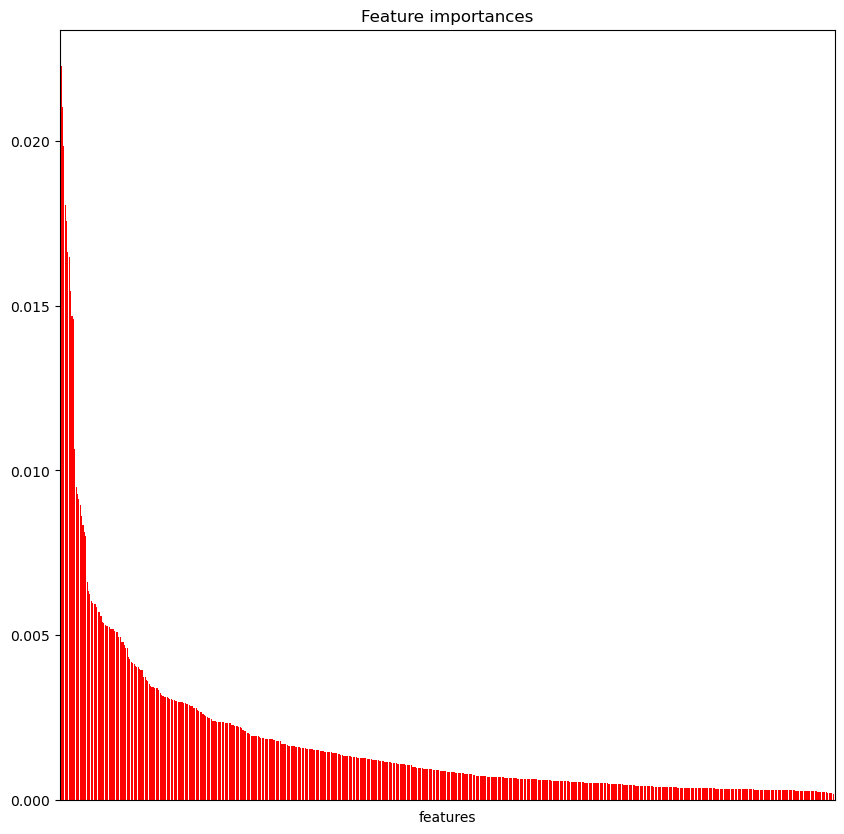

In [20]:
max_features = 10
n_estimators = 200

rf = RandomForestClassifier(n_jobs=-1, max_features=max_features, n_estimators=n_estimators)
rf.fit(X_train, y_train)

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
         color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xticks([])
plt.xlabel('features')
plt.show()

In [24]:
# Get the most important features
X_train1 = X_train[X_train.columns[indices][:250]]
X_test1 = X_test[X_test.columns[indices][:250]]

# Apply random forest with the most important features
rf = RandomForestClassifier(n_jobs=-1, max_features=max_features, n_estimators=n_estimators)
rf.fit(X_train1, y_train)
y_pred = rf.predict(X_test1)
print('accuracy = ', accuracy_score(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
by_class = matrix.diagonal()/matrix.sum(axis=1)
# round to 2 decimals
by_class = np.round(by_class, 2)
print('accuracy by class = ', by_class)

results = {}
results['accuracy'] = accuracy_score(y_test, y_pred)
for i in range(1, len(by_class)+1):
    results[f'class{i}'] = by_class[i-1]
results = pd.DataFrame(results, index=[0])
results


accuracy =  0.9152435167615434
accuracy by class =  [0.97 0.92 0.85 0.89 0.93 1.   0.78 0.8  0.72 0.72 0.61 0.56]


,accuracy,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12
0,0.915244,0.97,0.92,0.85,0.89,0.93,1.0,0.78,0.8,0.72,0.72,0.61,0.56


In [25]:
# remap the target variable
old_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
new_vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_train = y_train.replace(old_vals, new_vals)
y_test = y_test.replace(old_vals, new_vals)

In [26]:
# apply xgboost
from xgboost import XGBClassifier
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_res = []
max_depth_ = [1, 2, 3, 5, 7, 9, 11]
for i in max_depth_:
    xgb = XGBClassifier(n_jobs=-1, max_depth=i, n_estimators=n_estimators, verbosity=0, use_label_encoder=False)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_res.append(accuracy_score(y_test, y_pred))
    print('max_depth = ', i, 'accuracy = ', accuracy_score(y_test, y_pred))

/Users/mariusarlauskas/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


max_depth =  1 accuracy =  0.9386464263124604
max_depth =  2 accuracy =  0.9399114484503479
max_depth =  3 accuracy =  0.9364326375711575
max_depth =  5 accuracy =  0.926944971537002
max_depth =  7 accuracy =  0.9225173940543959
max_depth =  9 accuracy =  0.91808981657179
max_depth =  11 accuracy =  0.915876027830487


In [27]:
results2 = {'max_depth': max_depth_, 'accuracy': xgb_res}
results2 = pd.DataFrame(results2)
results2

,max_depth,accuracy
0,1,0.938646
1,2,0.939911
2,3,0.936433
3,5,0.926945
4,7,0.922517
5,9,0.918090
6,11,0.915876


In [28]:
# apply xgboost with the most important features and iterate over max_depth

xgb_res = []
for i in max_depth_:
    xgb = XGBClassifier(n_jobs=-1, max_depth=i, n_estimators=n_estimators, verbosity=0, use_label_encoder=False)
    xgb.fit(X_train1, y_train)
    y_pred = xgb.predict(X_test1)
    xgb_res.append(accuracy_score(y_test, y_pred))
    print('max_depth = ', i, 'accuracy = ', accuracy_score(y_test, y_pred))

results3 = {'max_depth': max_depth_, 'accuracy': xgb_res}
results3 = pd.DataFrame(results3)

max_depth =  1 accuracy =  0.9234661606578115
max_depth =  2 accuracy =  0.9316888045540797
max_depth =  3 accuracy =  0.9345351043643264
max_depth =  5 accuracy =  0.9199873497786212
max_depth =  7 accuracy =  0.9136622390891841
max_depth =  9 accuracy =  0.9086021505376344
max_depth =  11 accuracy =  0.9117647058823529


In [29]:
results3

,max_depth,accuracy
0,1,0.923466
1,2,0.931689
2,3,0.934535
3,5,0.919987
4,7,0.913662
5,9,0.908602
6,11,0.911765


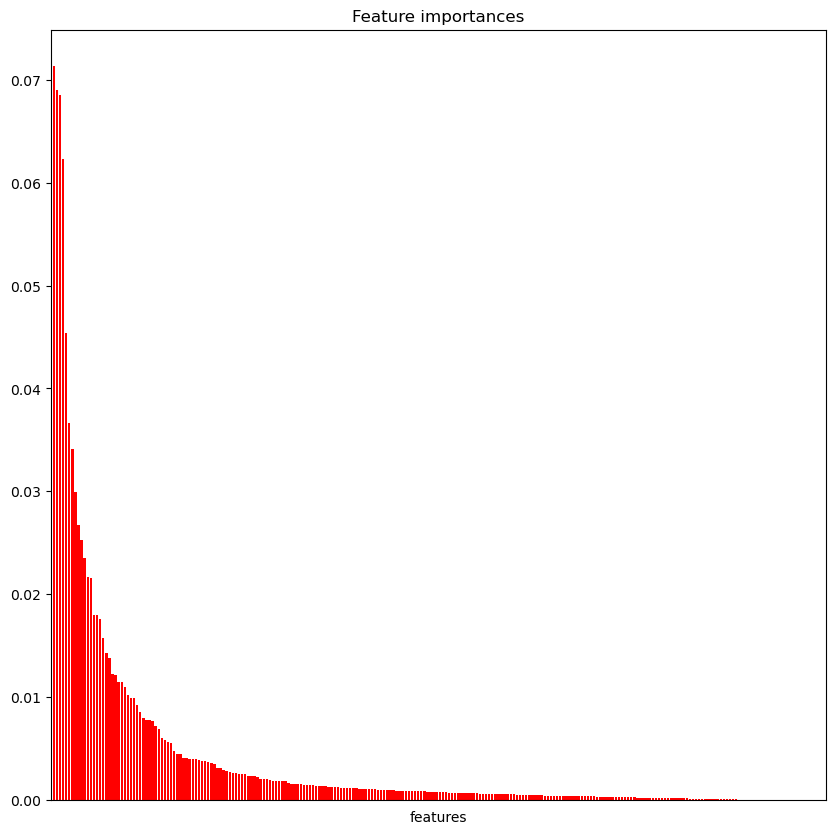

In [26]:
# display most important features
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
            color="r", align="center")
plt.xticks(range(X_train1.shape[1]), indices)
plt.xlim([-1, X_train1.shape[1]])
plt.xticks([])
plt.xlabel('features')
plt.show()

In [36]:
# take only top 33 percent of features
X_train2 = X_train1[X_train1.columns[indices][:int(X_train1.shape[1]*0.5)]]
X_test2 = X_test1[X_test1.columns[indices][:int(X_test1.shape[1]*0.5)]]

# apply xgboost with the most important features and iterate over max_depth
xgb_res = []
for i in max_depth_:
    xgb = XGBClassifier(n_jobs=-1, max_depth=i, n_estimators=n_estimators, verbosity=0, use_label_encoder=False)
    xgb.fit(X_train2, y_train)
    y_pred = xgb.predict(X_test2)
    xgb_res.append(accuracy_score(y_test, y_pred))
    print('max_depth = ', i, 'accuracy = ', accuracy_score(y_test, y_pred))

results4 = {'max_depth': max_depth_, 'accuracy': xgb_res}
results4 = pd.DataFrame(results4)

max_depth =  3 accuracy =  0.9297912713472486
max_depth =  5 accuracy =  0.9247311827956989
max_depth =  7 accuracy =  0.9184060721062619
max_depth =  9 accuracy =  0.9152435167615434
max_depth =  11 accuracy =  0.9165085388994307


In [38]:
results4

,max_depth,accuracy
0,3,0.929791
1,5,0.924731
2,7,0.918406
3,9,0.915244
4,11,0.916509


In [41]:
# Since we are overfitting we will try to tune the hyperparameters of the model
# We will use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

# xgboost
xgb = XGBClassifier(n_jobs=-1, n_estimators=n_estimators, verbosity=0, use_label_encoder=False)
param_grid = {'max_depth': [3], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1], 'subsample': [0.5, 0.75, 1]}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train2, y_train)
print('best parameters = ', grid_search.best_params_)
print('best score = ', grid_search.best_score_)
y_pred = grid_search.predict(X_test2)
print('accuracy = ', accuracy_score(y_test, y_pred))


/Users/mariusarlauskas/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mariusarlauskas/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mariusarlauskas/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mariusarlauskas/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: Fu

best parameters =  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.75}
best score =  0.9289331646060557
accuracy =  0.9304237824161923


In [42]:
print('best parameters = ', grid_search.best_params_)
print('best score = ', grid_search.best_score_)
print('accuracy = ', accuracy_score(y_test, y_pred))

best parameters =  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.75}
best score =  0.9289331646060557
accuracy =  0.9304237824161923


In [45]:
# create dataframe with the hyperparameters combinations tested and the accuracy
results = pd.DataFrame(grid_search.cv_results_)
# sort the results by the accuracy
results = results.sort_values(by='mean_test_score', ascending=False)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,207.346545,2.034221,0.018809,0.002974,0.1,3,0.75,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.925354,0.908623,0.913715,0.948487,0.948487,0.928933,0.016862,1
6,214.092924,13.392368,0.018137,0.003071,0.1,3,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.921493,0.908623,0.913071,0.949775,0.946555,0.927903,0.017082,2
3,269.613153,16.855689,0.024177,0.012775,0.05,3,0.5,"{'learning_rate': 0.05, 'max_depth': 3, 'subsa...",0.925997,0.906049,0.903413,0.947843,0.948487,0.926358,0.019444,3
8,219.686447,1.480163,0.017937,0.003464,0.1,3,1,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.923423,0.909910,0.909852,0.944623,0.943335,0.926229,0.015319,4
4,268.149233,3.697929,0.019922,0.002269,0.05,3,0.75,"{'learning_rate': 0.05, 'max_depth': 3, 'subsa...",0.927284,0.909266,0.904057,0.945911,0.943979,0.926100,0.017221,5
11,125.664919,3.499131,0.017517,0.002754,0.5,3,1,"{'learning_rate': 0.5, 'max_depth': 3, 'subsam...",0.918919,0.904762,0.902769,0.942692,0.948487,0.923526,0.018945,6
10,123.085376,1.652779,0.021643,0.012032,0.5,3,0.75,"{'learning_rate': 0.5, 'max_depth': 3, 'subsam...",0.916988,0.903475,0.902125,0.950419,0.943979,0.923397,0.020220,7
5,278.423597,0.225397,0.020363,0.002839,0.05,3,1,"{'learning_rate': 0.05, 'max_depth': 3, 'subsa...",0.928571,0.907979,0.887959,0.940760,0.943979,0.921850,0.021135,8
9,126.049525,1.231569,0.018688,0.008350,0.5,3,0.5,"{'learning_rate': 0.5, 'max_depth': 3, 'subsam...",0.907336,0.886744,0.910496,0.940760,0.945911,0.918249,0.022108,9
14,79.424729,17.799969,0.010988,0.002757,1,3,1,"{'learning_rate': 1, 'max_depth': 3, 'subsampl...",0.897683,0.881596,0.893754,0.929169,0.936896,0.907820,0.021399,10
